C:/Users/caslinj/peugeot_207_01.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 18 columns):
Unnamed                      8199 non-null int64
AltitudeVariation            8199 non-null float64
VehicleSpeedInstantaneous    8196 non-null float64
VehicleSpeedAverage          8199 non-null float64
VehicleSpeedVariance         8199 non-null float64
VehicleSpeedVariation        8199 non-null float64
LongitudinalAcceleration     8199 non-null float64
EngineLoad                   8194 non-null float64
EngineCoolantTemperature     8194 non-null float64
ManifoldAbsolutePressure     8194 non-null float64
EngineRPM                    8194 non-null float64
MassAirFlow                  8194 non-null float64
IntakeAirTemperature         8194 non-null float64
VerticalAcceleration         8199 non-null float64
FuelConsumptionAverage       8194 non-null float64
roadSurface                  8199 non-null object
traffic                      8199 non-null o

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 18 columns):
Unnamed: 0                   7038 non-null int64
AltitudeVariation            7038 non-null float64
VehicleSpeedInstantaneous    7038 non-null float64
VehicleSpeedAverage          7038 non-null float64
VehicleSpeedVariance         7038 non-null float64
VehicleSpeedVariation        7038 non-null float64
LongitudinalAcceleration     7038 non-null float64
EngineLoad                   7038 non-null float64
EngineCoolantTemperature     7038 non-null int64
ManifoldAbsolutePressure     7038 non-null int64
EngineRPM                    7038 non-null int64
MassAirFlow                  7038 non-null float64
IntakeAirTemperature         7038 non-null int64
VerticalAcceleration         7038 non-null float64
FuelConsumptionAverage       7038 non-null float64
roadSurface                  7038 non-null object
traffic                      7038 non-null object
drivingStyle                 7038 non-

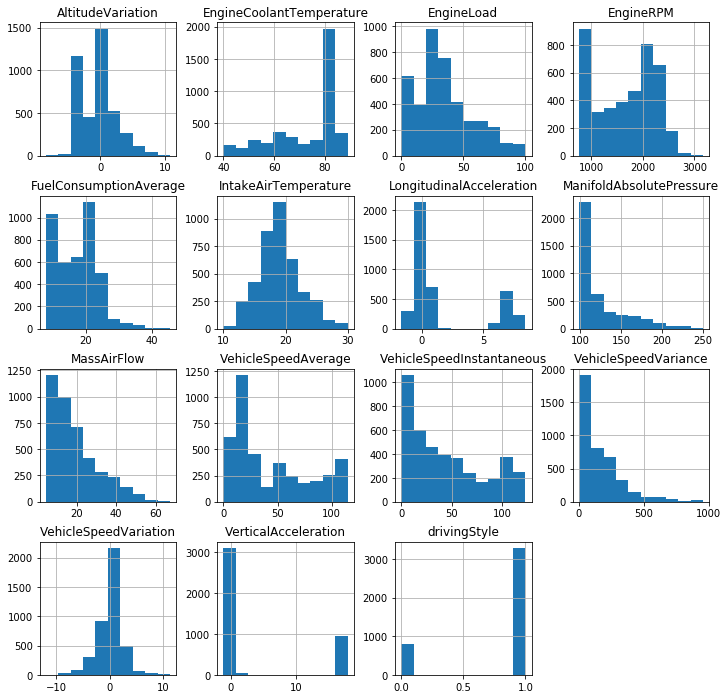

                           AltitudeVariation  VehicleSpeedInstantaneous  \
AltitudeVariation                   1.000000                   0.025879   
VehicleSpeedInstantaneous           0.025879                   1.000000   
VehicleSpeedAverage                 0.048324                   0.866985   
VehicleSpeedVariance               -0.105666                  -0.053748   
VehicleSpeedVariation              -0.009621                   0.041207   
LongitudinalAcceleration            0.078604                   0.032659   
EngineLoad                          0.140768                   0.274486   
EngineCoolantTemperature           -0.008699                   0.238059   
ManifoldAbsolutePressure            0.100146                   0.718100   
EngineRPM                          -0.014979                   0.839419   
MassAirFlow                         0.034940                   0.815264   
IntakeAirTemperature                0.095439                   0.346447   
VerticalAcceleration     

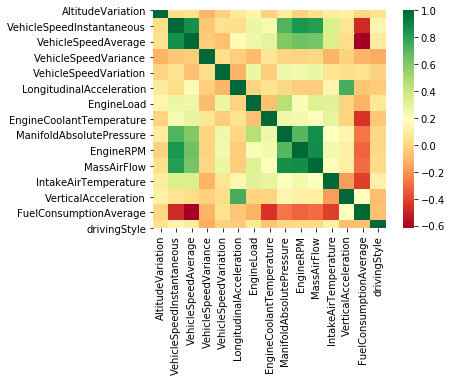

<class 'numpy.ndarray'> (23762, 14)
<class 'numpy.ndarray'> (23762,)
                 0             1             2             3             4   \
count  2.376200e+04  2.376200e+04  2.376200e+04  2.376200e+04  2.376200e+04   
mean   1.196099e-17 -1.100411e-16  1.196099e-16 -1.435319e-17 -4.784397e-18   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -1.163514e+01 -1.141399e+00 -1.246129e+00 -9.407889e-01 -7.575009e+00   
25%   -5.434042e-01 -7.958879e-01 -7.325556e-01 -6.888588e-01 -3.729702e-01   
50%    7.811474e-02 -2.111766e-01 -3.046257e-01 -3.172572e-01  6.084671e-03   
75%    4.605878e-01  4.798459e-01  3.642729e-01  3.191416e-01  3.851400e-01   
max    5.576170e+00  2.542570e+00  2.649230e+00  6.819000e+00  4.094399e+01   

                 5             6             7             8             9   \
count  23762.000000  2.376200e+04  2.376200e+04  2.376200e+04  2.376200e+04   
mean       0.000000 -2.870638e-17  1.531007e-16 -1.243943e-16

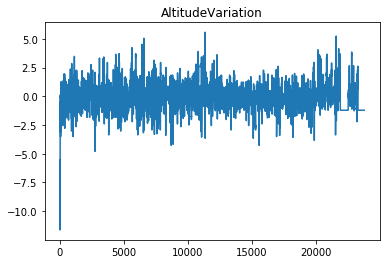

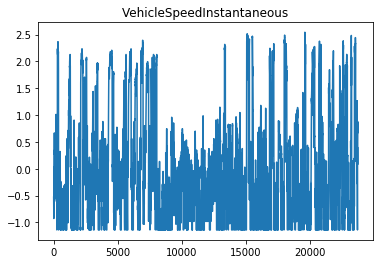

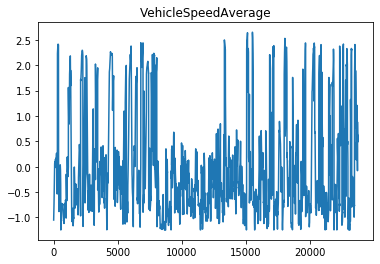

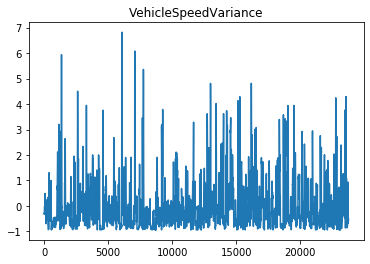

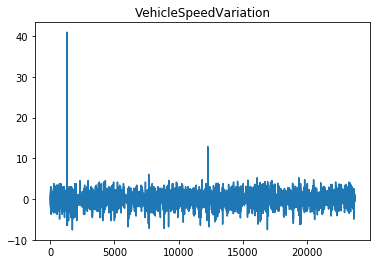

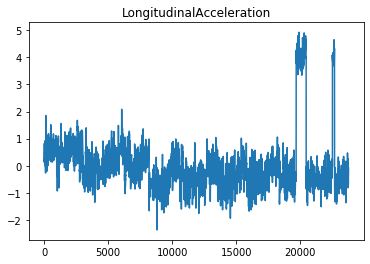

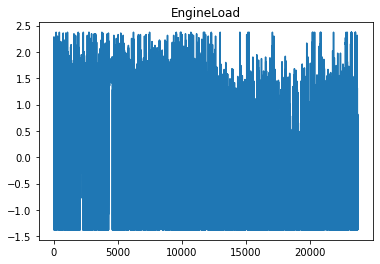

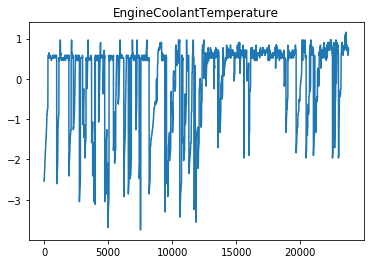

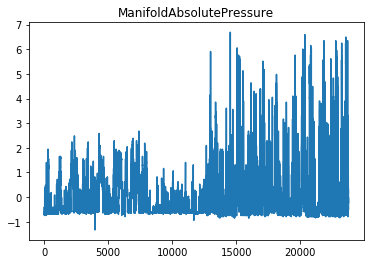

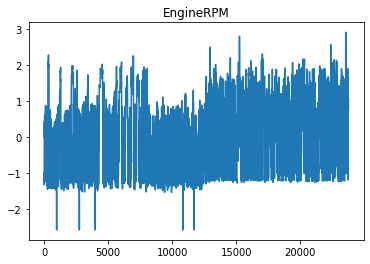

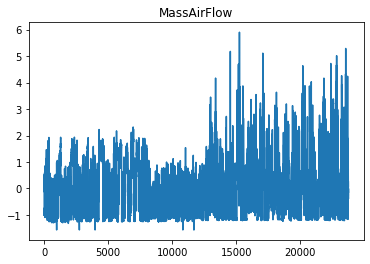

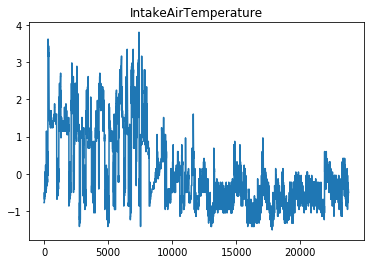

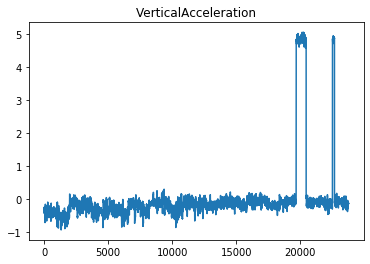

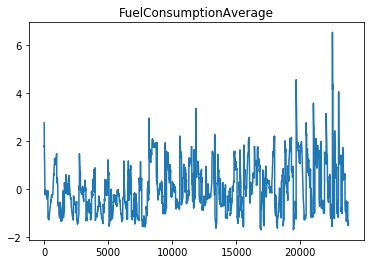

**** Instantiate a Logistic Regression Classifier *****
**** Split the Data into a Training Set and a Test Set *****
**** Fit the Model on the Training Set *****


In [ ]:
# Import Python library modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

list_filepaths = ['C:/Users/caslinj/peugeot_207_01.csv', 'C:/Users/caslinj/peugeot_207_02.csv', 'C:/Users/caslinj/opel_corsa_01.csv', 'C:/Users/caslinj/opel_corsa_02.csv']

# Create an empty DataFrame and an empty list
df_final = pd.DataFrame()
dataframes = []

# for loop to read in the files
for f in list_filepaths:
    print(f)
    dfp1 = pd.read_csv(f, sep=';')
    # for loop to change driving style descriptions to binary and 
    # elimnate columns not needed for an analysis of drivingStyle 
    dfp1.info()
    dfp1['drivingStyle'] = dfp1['drivingStyle'].replace(['EvenPaceStyle','AggressiveStyle'],['1','0'])
    dfp1['drivingStyle'] = dfp1['drivingStyle'].astype(int)
    
    # Print a list of the dataframe's column headings
    print(dfp1.columns)

    # Drop first column and the two unwanted target variable columns
    list_columns_to_drop = [dfp1.columns[0],"roadSurface","traffic"]
    dfp1_dropped=dfp1.drop(list_columns_to_drop, axis='columns')
    
    # Compare earlier .info() result with post-drop-columns result
    dfp1.info()
    
    # Perform nan clearing: check the shape of the dataframe before and after nan cleaning
    # Review the cleaned data using the .describe() method and check the list of columns

    print(dfp1_dropped.shape)
    dfp1_nan=dfp1_dropped.dropna(how='any')
    print(dfp1_nan.shape)
    df=dfp1_nan.dropna(how='any')
    print(df.shape)
    print(df.describe())
    print(df.columns)

# Add the cleaned dataframes to a list
    dataframes.append(df)
    
df_final=pd.concat(dataframes)
    
# Examine the cleaned dataframe and plot a histogram of the feature variables and the target variable
print(df_final.describe())  
df.hist(figsize=(12,12))
plt.show()

#******** Correlation Analysis ************"
df_final.corr().unstack()
print(df_final.corr())
sns.heatmap(df_final.corr(), square=True, cmap='RdYlGn')
plt.show()

#**** Create the Features Array and the Response Variable Array ******
X = df_final.drop('drivingStyle', axis=1).values
y = df_final['drivingStyle'].values

# Examine the type and shape of X and y
print(type(X), X.shape)
print(type(y), y.shape)

#**** Scaling of Features (Normalisation) ******
X_scaled = scale(X)

#**** Plot the scaled feature variables ******
newdf = pd.DataFrame(X_scaled)
print(newdf.describe())
names_columns = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
       'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage']
newdf.columns = names_columns
print(newdf.columns)

for col in newdf.columns:
    plt.plot(newdf[col].values)
    plt.title(col)
    plt.show()

#**** Instantiate a Logistic Regression Classifier and set the maximum number of iterations to 10,000 *****
logreg = LogisticRegression(max_iter=10000)

# Set the hyperparameter matrix over which grid search should be performed for SVC
parameters = {'C':[1,10,100], 'gamma':[0.1,0.01]}

# Instantiate GridSearchCV using five fold cross validation
cv = GridSearchCV(SVC(probability=True), param_grid=parameters, cv=5)

#**** Split the Data into a Training Set and a Test Set *****
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21) 

#**** Fit the Models on the Training Set *****
logreg.fit(X_train, y_train)
#svm.fit(X_train, y_train)
cv.fit(X_train, y_train)


#*** Predict on the Test Set and find the predicted probability for use in the sketching of the ROC AUC curve *****
y_predLR = logreg.predict(X_test)
y_predLR_proba = logreg.predict_proba(X_test)[:,1]

y_pred_cv = cv.predict(X_test)
y_predSVC_proba = cv.predict_proba(X_test)[:,1]

print("**** Logistic Regression Results Training and Validation Accuracy *****")
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

# Printing of the confusion matrix, classification report, and ROC AUC Curve for Logistic Regression
print(confusion_matrix(y_test, y_predLR))
print(classification_report(y_test, y_predLR))
print('ROC AUC score: {:.4f}'.format(roc_auc_score(y_test, y_predLR_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_predLR_proba)
plt.plot([0 ,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# Printing of the accuracy scores on the training and test sets, confusion matrix, classification report, and ROC AUC Curve for SVC
print("**** SVC Results Training and Validation Accuracy *****")
print('Accuracy:{:.4f}'.format(cv.score(X_train, y_train)))
print('Accuracy:{:.4f}'.format(cv.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred_cv))
print(classification_report(y_test, y_pred_cv))

print('ROC AUC score: {:.4f}'.format(roc_auc_score(y_test, y_predSVC_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_predSVC_proba)
plt.plot([0 ,1], [0, 1], 'k--')
plt.plot(fpr,tpr, label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.show()

# Print the values of the hyperparameters of SVC, C and gamma, that provided the best the best model results on cross validation
print('Tuned model parameters:{}'.format(cv.best_params_))




      

